In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleansed.csv')
df.shape

(3840, 2)

In [3]:
df.head()

,Time,domain
0,2021-10-02 17:27:19,chrome.google.com
1,2021-10-02 17:26:24,chrome.google.com
2,2021-10-02 17:26:12,www.google.com
3,2021-10-02 17:26:08,www.google.com
4,2021-10-02 17:23:31,localhost:8888


In [4]:
df.tail()

,Time,domain
3835,2021-08-20 06:09:54,www.grammarly.com
3836,2021-08-20 06:08:57,accounts.google.com
3837,2021-08-20 06:08:38,accounts.google.com
3838,2021-08-20 06:08:38,accounts.google.com
3839,2021-08-20 06:08:37,accounts.google.com


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df.head()

,Time,domain
0,2021-10-02 17:27:19,chrome.google.com
1,2021-10-02 17:26:24,chrome.google.com
2,2021-10-02 17:26:12,www.google.com
3,2021-10-02 17:26:08,www.google.com
4,2021-10-02 17:23:31,localhost:8888


In [10]:
df['domain'].value_counts()[:50]

github.com                          718
blackboard.umbc.edu                 489
www.google.com                      440
docs.google.com                     362
webauth.umbc.edu                    270
mail.google.com                     270
www.youtube.com                     177
bookshelf.vitalsource.com           166
courses.3rdmil.com                   78
localhost:8888                       62
infinity.icicibank.com               54
my.umbc.edu                          49
www.jetbrains.com                    35
icheck.sita.aero                     29
umbcstudents-md.safecolleges.com     29
accounts.google.com                  28
my3.my.umbc.edu                      27
web.whatsapp.com                     23
en.wikipedia.org                     19
stackoverflow.com                    19
login.wifi.connected.xfinity.com     18
highpoint-prd.ps.umbc.edu            17
umbc-csm.symplicity.com              17
discuss.codecademy.com               16
rtforms.umbc.edu                     14


<AxesSubplot:>

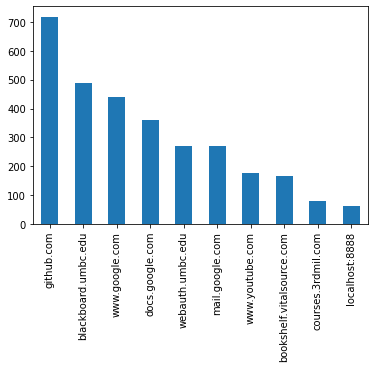

In [11]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [12]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     168
1      36
2       1
3      11
6      95
7      45
8     112
9      53
10    169
11    161
12    313
13    261
14    163
15    195
16    241
17    427
18    297
19    283
20    256
21    177
22    185
23    191
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

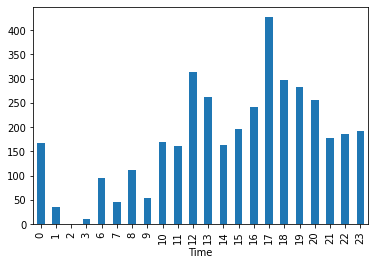

In [13]:
hourly_counts.plot.bar()

In [14]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-10-02 17:27:19,chrome.google.com,Saturday,5
1,2021-10-02 17:26:24,chrome.google.com,Saturday,5
2,2021-10-02 17:26:12,www.google.com,Saturday,5
3,2021-10-02 17:26:08,www.google.com,Saturday,5
4,2021-10-02 17:23:31,localhost:8888,Saturday,5


In [15]:
df['Day'].value_counts()

Tuesday      1083
Wednesday     897
Sunday        540
Monday        471
Thursday      336
Saturday      283
Friday        230
Name: Day, dtype: int64

In [16]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     471
1    1083
2     897
3     336
4     230
5     283
6     540
Name: DayIndex, dtype: int64

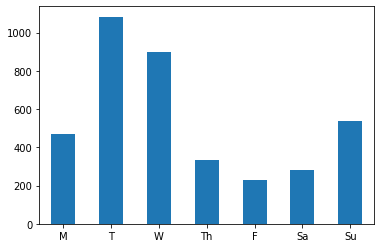

In [17]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [18]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-10-02 17:27:19,chrome.google.com,Saturday,5,True
1,2021-10-02 17:26:24,chrome.google.com,Saturday,5,True
2,2021-10-02 17:26:12,www.google.com,Saturday,5,True
3,2021-10-02 17:26:08,www.google.com,Saturday,5,True
4,2021-10-02 17:23:31,localhost:8888,Saturday,5,True


In [19]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [20]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-10-02 17:27:19,chrome.google.com,Saturday,5,True
1,2021-10-02 17:26:24,chrome.google.com,Saturday,5,True
2,2021-10-02 17:26:12,www.google.com,Saturday,5,True
3,2021-10-02 17:26:08,www.google.com,Saturday,5,True
4,2021-10-02 17:23:31,localhost:8888,Saturday,5,True


In [21]:
weekday['domain'].value_counts()[:5]

blackboard.umbc.edu    424
github.com             421
docs.google.com        362
www.google.com         327
mail.google.com        256
Name: domain, dtype: int64

In [22]:
weekend['domain'].value_counts()[:5]

github.com             297
www.google.com         113
blackboard.umbc.edu     65
www.youtube.com         54
localhost:8888          34
Name: domain, dtype: int64

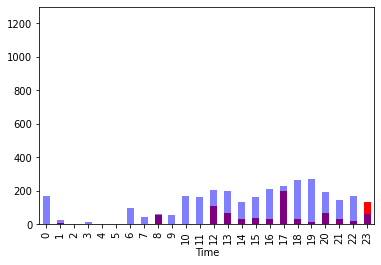

In [23]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [24]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

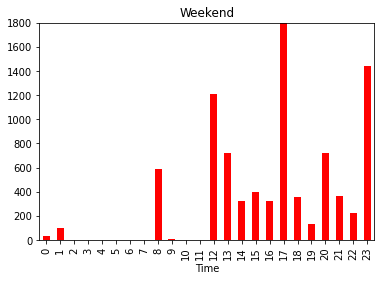

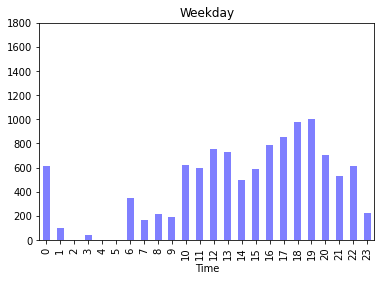

In [25]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [26]:
df['domain'].value_counts()[:50]

github.com                          718
blackboard.umbc.edu                 489
www.google.com                      440
docs.google.com                     362
webauth.umbc.edu                    270
mail.google.com                     270
www.youtube.com                     177
bookshelf.vitalsource.com           166
courses.3rdmil.com                   78
localhost:8888                       62
infinity.icicibank.com               54
my.umbc.edu                          49
www.jetbrains.com                    35
icheck.sita.aero                     29
umbcstudents-md.safecolleges.com     29
accounts.google.com                  28
my3.my.umbc.edu                      27
web.whatsapp.com                     23
en.wikipedia.org                     19
stackoverflow.com                    19
login.wifi.connected.xfinity.com     18
highpoint-prd.ps.umbc.edu            17
umbc-csm.symplicity.com              17
discuss.codecademy.com               16
rtforms.umbc.edu                     14


In [27]:
df['domain'] = df['domain'].astype(str)

In [28]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

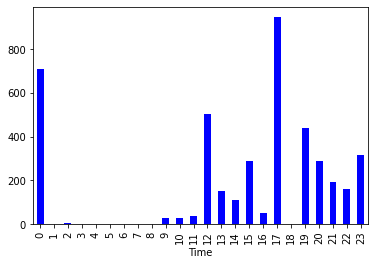

In [33]:
_= show_domain_stats('github.com', 'blue')

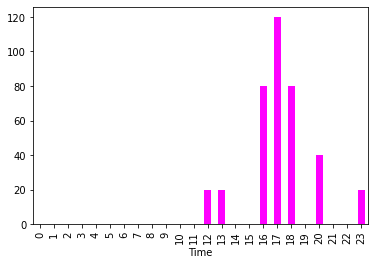

In [30]:
_ = show_domain_stats('stackover', 'magenta')


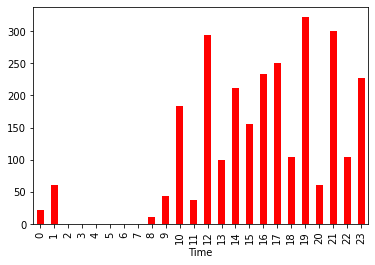

In [34]:
_ = show_domain_stats('blackboard', 'red')


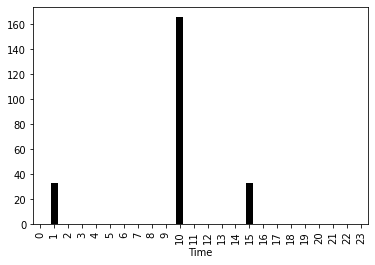

In [32]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here

__NOTE__: If you give your permission for another student to analyze your `history_cleaned.csv` please commit it with this hw file.

(Your name will stay confidencial)